In [17]:
import deep_lib.model_structure as dl
import deep_lib.plot_utils as dlu
import h5py
import numpy as np
import scipy
import ipywidgets as wg

from scipy import ndimage

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def load_data(training_file='datasets/train_catvnoncat.h5', test_file='datasets/test_catvnoncat.h5'):
    train_dataset = h5py.File(training_file, "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    test_dataset = h5py.File(test_file, "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [3]:
layers_dims = (12288, 20, 7, 5, 1)
train_x_orig, train_y, test_x_orig, test_y, classes = load_data('/Users/fperez/dev/datasets/train_catvnoncat.h5', '/Users/fperez/dev/datasets/test_catvnoncat.h5')

In [4]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten / 255.
test_x = test_x_flatten / 255.

In [5]:
np.random.seed(1)
model = dl.LLayerModel()
parameters, costs = model.execute(train_x, train_y, layers_dims, 0.0075, num_iterations=1000, save_cost=True)

2018-04-09 15:36:29,855 - deep_lib.model_structure - INFO - LLayer model created...


FloatProgress(value=0.0, description='Iterations:', max=1000.0)

2018-04-09 15:36:29,871 - deep_lib.model_structure - INFO - Starting model execution...
2018-04-09 15:36:29,886 - deep_lib.model_parameters - INFO - W1 shape: (20, 12288)
2018-04-09 15:36:29,887 - deep_lib.model_parameters - INFO - b1 shape: (20, 1)
2018-04-09 15:36:29,888 - deep_lib.model_parameters - INFO - W2 shape: (7, 20)
2018-04-09 15:36:29,889 - deep_lib.model_parameters - INFO - b2 shape: (7, 1)
2018-04-09 15:36:29,891 - deep_lib.model_parameters - INFO - W3 shape: (5, 7)
2018-04-09 15:36:29,892 - deep_lib.model_parameters - INFO - b3 shape: (5, 1)
2018-04-09 15:36:29,893 - deep_lib.model_parameters - INFO - W4 shape: (1, 5)
2018-04-09 15:36:29,894 - deep_lib.model_parameters - INFO - b4 shape: (1, 1)
2018-04-09 15:36:29,935 - deep_lib.model_structure - INFO - Cost after iteration 0: 0.771749 (elapsed time: 39.456ms)
2018-04-09 15:36:32,321 - deep_lib.model_structure - INFO - Cost after iteration 100: 0.672053 (elapsed time: 24.408ms)
2018-04-09 15:36:35,458 - deep_lib.model_st

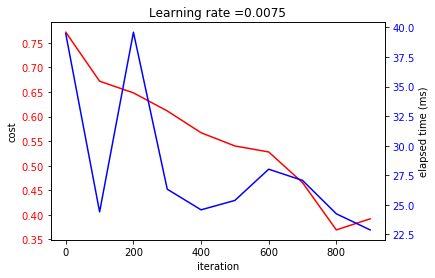

In [6]:
labels = {'learning_rate' : 0.0075}
dlu.plot(costs, **labels)

In [7]:
train_predictions = model.predict(train_x, train_y, parameters)
test_predictions = model.predict(test_x, test_y, parameters)

Accuracy: 0.947368421053
Accuracy: 0.66


In [8]:
image_widget = wg.interactive(dlu.load_image, url="http://78.media.tumblr.com/tumblr_lnqvm6zb671qi7nl3o1_1280.jpg")

display(image_widget)

interactive(children=(Text(value='http://78.media.tumblr.com/tumblr_lnqvm6zb671qi7nl3o1_1280.jpg', description…

In [31]:
num_px = 64
my_label_y = [1]
image = image_widget.result
print(image.shape)
# print(image)
my_image = scipy.misc.imresize(image, size=(num_px,num_px)).reshape((num_px*num_px*3,1))
print(my_image.shape)
my_predicted_image = model.predict(my_image, my_label_y, parameters)



(930, 750, 3)
(12288, 1)
Accuracy: 1.0


y = 1.0, your L-layer model predicts a "cat" picture.


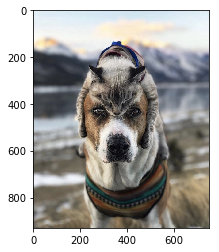

In [32]:
plt.imshow(image)
print ("y = " + str(np.squeeze(my_predicted_image)) + ", your L-layer model predicts a \"" + classes[int(np.squeeze(my_predicted_image)),].decode("utf-8") +  "\" picture.")